В цьому наборі завдань закріпимо те, що було на лекції з Computer Vision.

In [1]:
# Імпортуємо PyTorch
import torch
from torch import nn

# Імпортуємо torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Імпортуємо matplotlib для візуалізації
import matplotlib.pyplot as plt

# Перевіряємо версії
# Примітка: ваша версія PyTorch не повинна бути нижчою за 1.10.0, а версія torchvision не повинна бути нижчою за 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.6.0+cu124
torchvision version: 0.21.0+cu124


# Computer Vision with PyTorch Excercises. Solution


## 1. Наведіть 3 галузі промисловості, де комп'ютерний зір використовується сьогодні (можна згадати з лекції, або провести міні-рісерч).

## 2. Виділіть 20 хвилин аби ознайомитись та переглянути сайт [CNN Explainer](https://poloclub.github.io/cnn-explainer/).

* Завантажте власне будь-яке зображення за допомогою кнопки Upload" на сайті та подивіться, що відбувається на кожному шарі CNN, коли ваше зображення проходить через нього.

Напишіть 3 пункти, що ви дізнались після цієї вправи?

1. Аграрка - аналіз зображень з дрону для виявлення як гарноросте культура
2. Медицина - аналіз знімків (кт, мрт) для автоматичного відслідковуівння патологій
3. Безпека - вхід до приміщення по розпізнаванню облича, відбитка пальця, верифікація\ідентифікація користувача

## 3. Завантажте навчальні та тестові набори даних [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST).

MNIST - базовий набір даних для задач Computer Vision. Часто використовується для навчання.

- Виведіть, скільки елементів в кожному наборі.
- Покажіть формат (розмірності) кожної картинки.
- Виведіть, які класи представлені в цьому наборі даних.

In [2]:
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

print(f"Number of training samples: {len(train_data)}, Number of test samples: {len(test_data)}")
print(f"Shape of a single training sample: {train_data[0][0].shape}, Label: {train_data[0][1]}")
print(f"Unique labels in the dataset: {train_data.classes}")

100%|██████████| 9.91M/9.91M [00:00<00:00, 13.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 527kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.47MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.02MB/s]

Number of training samples: 60000, Number of test samples: 10000
Shape of a single training sample: torch.Size([1, 28, 28]), Label: 5
Unique labels in the dataset: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [ ]:
train_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

# Висновки 3

- Зображення має розміри 28 на 28 кожне.
- Класи розподілені від 0 до 9, окреми йклас для кожної цифри
- Тренувальний набор включає 60к даних, тестувальний - 10к

## 4. Візуалізуйте щонайменше 5 різних зразків з навчального набору даних MNIST.

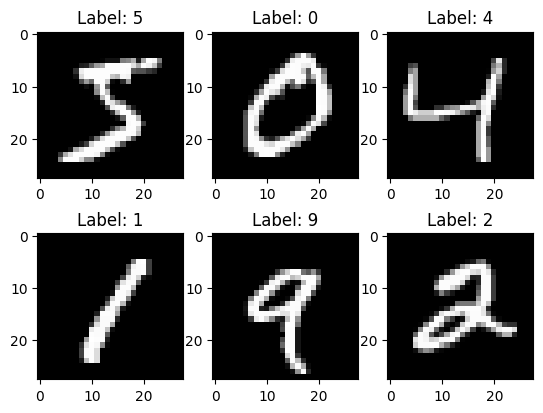

In [ ]:
for i in range(1, 7):
    image, label = train_data[i-1]
    plt.subplot(2, 3, i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f"Label: {label}")

plt.show()

## 5. Перетворіть навчальні та тестові набори даних MNIST у data loaders за допомогою `torch.utils.data.DataLoader`, встановіть `batch_size=32`.
- Покажіть, яку форму даних вертають дата лоадери.

In [3]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

print(f"Number of batches in training set: {len(train_dataloader)}, Number of batches in test set: {len(test_dataloader)}")
print(f"Shape of a single batch: {next(iter(train_dataloader))[0].shape}, Labels: {next(iter(train_dataloader))[1].shape}")

Number of batches in training set: 1875, Number of batches in test set: 313
Shape of a single batch: torch.Size([32, 1, 28, 28]), Labels: torch.Size([32])


## 6. Відтворіть `ModelV2`, яку ми розглядали на лекції
Це до слова та сама модель з [сайту CNN Explainer](https://poloclub.github.io/cnn-explainer/), також відома як TinyVGG і вона здатна навчатися на наборі даних MNIST.

Напишіть клас моделі.

In [16]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU())

        self.MaxPool2d = nn.MaxPool2d(kernel_size=2)

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU())

        self.flatten = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7, out_features=output_shape)
        )

    def forward(self, x):
        # print("Input shape:", x.shape)
        x = self.conv_block_1(x)
        # print("After conv_block_1:", x.shape)
        x = self.conv_block_2(x)
        # print("After first conv_block_2:", x.shape)
        x = self.MaxPool2d(x)
        # print("After first MaxPool2d:", x.shape)
        x = self.conv_block_2(x)
        # print("After second conv_block_2:", x.shape)
        x = self.conv_block_2(x)
        # print("After third conv_block_2:", x.shape)
        x = self.MaxPool2d(x)
        # print("After second MaxPool2d:", x.shape)
        x = self.flatten(x)
        # print("After flatten:", x.shape)
        return x

torch.manual_seed(42)
model = TinyVGG(input_shape=1, hidden_units=10, output_shape=len(train_data.classes))
model

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (MaxPool2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (flatten): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [11]:
out = model(torch.randn(32, 1, 28, 28))

# Висновки 6

- Створемо Sequential для внутрішнього шару згортки разом з ReLU та будумо викликати його декілька разів в форвард щоб відтворити структуру мережі

## 7. Навчіть модель, яку ви побудували в попередній вправі, протягом 5 епох на CPU та GPU і подивіться, скільки часу це займе в кожному з варіантів.

In [12]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Training time: {total_time:.3f} seconds on {device}")

    return total_time

In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"

loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

from timeit import default_timer as timer
training_time_start = timer()
epochs = 5
model.to(device)
for epoch in range(epochs):
    print(f"Epoch: {epoch+1}/{epochs}")
    model.train()
    train_loss = 0
    train_acc = 0
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss_value = loss(y_pred, y)

        optimizer.zero_grad()
        loss_value.backward()
        optimizer.step()

        train_loss += loss_value.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
    train_loss /= len(train_dataloader)
    train_acc /= len(train_data)
    print(f"Train loss: {train_loss:.4f}, Train accuracy: {train_acc:.4f}")

    with torch.no_grad():
        model.eval()
        test_loss = 0
        test_acc = 0
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss_value = loss(y_pred, y)
            test_loss += loss_value.item()
            test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_loss /= len(test_dataloader)
        test_acc /= len(test_data)
        print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

training_time_end = timer()
total_training_time = print_train_time(training_time_start, training_time_end, device=device)

Epoch: 1/5
Train loss: 0.2432, Train accuracy: 0.9216
Test loss: 0.0834, Test accuracy: 0.9729
Epoch: 2/5
Train loss: 0.0845, Train accuracy: 0.9743
Test loss: 0.0541, Test accuracy: 0.9829
Epoch: 3/5
Train loss: 0.0656, Train accuracy: 0.9799
Test loss: 0.0604, Test accuracy: 0.9795
Epoch: 4/5
Train loss: 0.0547, Train accuracy: 0.9832
Test loss: 0.0448, Test accuracy: 0.9855
Epoch: 5/5
Train loss: 0.0468, Train accuracy: 0.9850
Test loss: 0.0423, Test accuracy: 0.9862
Training time: 60.196 seconds on cuda


In [17]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

from timeit import default_timer as timer
training_time_start = timer()
epochs = 5

for epoch in range(epochs):
    print(f"Epoch: {epoch+1}/{epochs}")
    model.train()
    train_loss = 0
    train_acc = 0
    for batch, (X, y) in enumerate(train_dataloader):
        y_pred = model(X)
        loss_value = loss(y_pred, y)

        optimizer.zero_grad()
        loss_value.backward()
        optimizer.step()

        train_loss += loss_value.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
    train_loss /= len(train_dataloader)
    train_acc /= len(train_data)
    print(f"Train loss: {train_loss:.4f}, Train accuracy: {train_acc:.4f}")

    with torch.no_grad():
        model.eval()
        test_loss = 0
        test_acc = 0
        for X, y in test_dataloader:
            y_pred = model(X)
            loss_value = loss(y_pred, y)
            test_loss += loss_value.item()
            test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_loss /= len(test_dataloader)
        test_acc /= len(test_data)
        print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

training_time_end = timer()
total_training_time = print_train_time(training_time_start, training_time_end, device="CPU")

Epoch: 1/5
Train loss: 0.2596, Train accuracy: 0.9166
Test loss: 0.0811, Test accuracy: 0.9720
Epoch: 2/5
Train loss: 0.0855, Train accuracy: 0.9735
Test loss: 0.0601, Test accuracy: 0.9821
Epoch: 3/5
Train loss: 0.0639, Train accuracy: 0.9801
Test loss: 0.0448, Test accuracy: 0.9854
Epoch: 4/5
Train loss: 0.0530, Train accuracy: 0.9836
Test loss: 0.0438, Test accuracy: 0.9865
Epoch: 5/5
Train loss: 0.0458, Train accuracy: 0.9856
Test loss: 0.0424, Test accuracy: 0.9856
Training time: 251.263 seconds on CPU


# Висновки 6

| Device | Train Loss | Train Accuracy | Test Loss | Test Accuracy | Training Time (s) |
|--------|------------|----------------|-----------|----------------|-------------------|
| CUDA   | 0.0468     | 0.9850         | 0.0423    | 0.9862         | 60.196            |
| CPU    | 0.0458     | 0.9856         | 0.0424    | 0.9856         | 251.263           |


- в обох режимах нейрона мережа досягла однакової точності, але при цьому з CUDA тренування зайняло вчотири рази меншу часу (60 vs 251 секуед)

## 8. Зробіть прогнози за допомогою вашої навченої моделі та візуалізуйте принаймні 5 з них, порівнюючи прогноз з цільовою міткою.

In [18]:
test_data_predict = model(test_data.data.unsqueeze(1).float())
predicted_labels = test_data_predict.argmax(dim=1)

In [ ]:
predicted_labels, test_data.targets

(tensor([7, 2, 1,  ..., 4, 5, 6]), tensor([7, 2, 1,  ..., 4, 5, 6]))

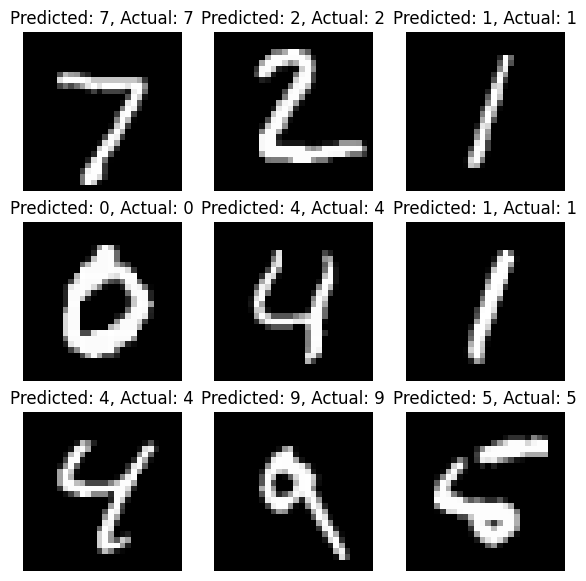

In [19]:
plt.figure(figsize=(7, 7))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(test_data.data[i-1], cmap="gray")
    plt.title(f"Predicted: {predicted_labels[i-1].item()}, Actual: {test_data.targets[i-1].item()}")
    plt.axis("off")

## 9. Побудуйте матрицю плутанини, порівнюючи передбачення вашої моделі з істинними мітками.

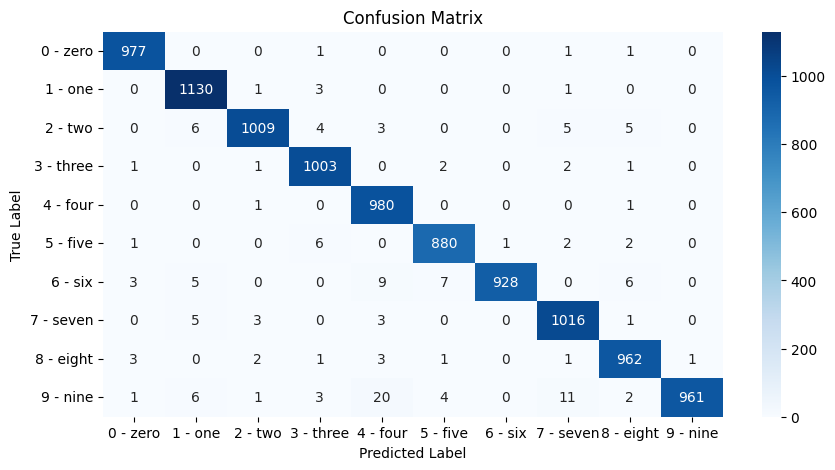

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_data.targets, predicted_labels)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_data.classes, yticklabels=test_data.classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## 10. Виведіть принаймні 9 прикладів, де модель помиляється, разом з тим, якою мала бути мітка зображення.
* Після візуалізації цих прогнозів, як ви думаєте, це більше помилка моделювання чи помилка даних?
* Тобто, чи може модель працювати краще, чи мітки даних занадто близькі одна до одної, що навіть людина не може чітко розрізнити що це за цифра?

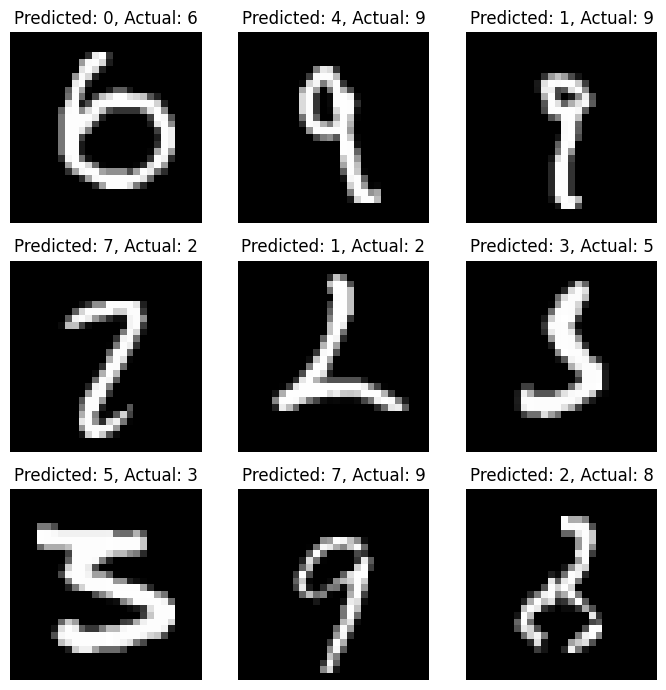

In [ ]:
test_data_false = test_data.data[predicted_labels != test_data.targets]
predicted_labels_false = predicted_labels[predicted_labels != test_data.targets]

plt.figure(figsize=(7, 7))
for i in range(1, 10):

    plt.subplot(3, 3, i)
    plt.imshow(test_data_false[i-1], cmap="gray")
    plt.title(f"Predicted: {predicted_labels_false[i-1].item()}, Actual: {test_data.targets[predicted_labels != test_data.targets][i-1].item()}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# Висновки 6

- Модель показує дуже гарні метрики точніості та рідко помиляється
- При аналізі помилок можна побачити що помилки є логічними та деякі цифри схожі на інші з якоми їх плутає мережа.
- Едине що плутання 7 з 9 може викликати питання, бо візуальн оовни доволі несхожі, та зазвичай вони не виглядають однаково

## 11. Створіть випадковий тензор форми `[1, 3, 64, 64]` і пропустіть його через шар `nn.Conv2d()` з різними налаштуваннями гіперпараметрів (ви можете вибрати будь-які налаштування), що ви помічаєте, якщо параметр `kernel_size` збільшується або зменшується?

In [ ]:
tensor_random = torch.randn(1, 2, 64, 64)

def try_parameter_conv( kernel_size, stride, padding, tensor,in_channels=2, out_channels=4):
    print(f"Trying Conv2d with kernel_size={kernel_size}, stride={stride}, padding={padding}")
    conv_layer = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, stride=stride, padding=padding)
    print_conv_layer_info(conv_layer, tensor)
    return conv_layer

def print_conv_layer_info(conv_layer, tensor):
    output_tensor = conv_layer(tensor)
    print(f"Input tensor shape: {tensor.shape}")
    print(f"Output tensor shape: {output_tensor.shape}")
    print(f"Number of parameters in the convolutional layer: {sum(p.numel() for p in conv_layer.parameters())}")
    print("-----------\n")




In [ ]:
con1 = try_parameter_conv(kernel_size=2, stride=1, padding=1, tensor=tensor_random)
con1 = try_parameter_conv(kernel_size=3, stride=1, padding=1, tensor=tensor_random)
con2 = try_parameter_conv(kernel_size=5, stride=1, padding=1, tensor=tensor_random)

Trying Conv2d with kernel_size=2, stride=1, padding=1
Input tensor shape: torch.Size([1, 2, 64, 64])
Output tensor shape: torch.Size([1, 4, 65, 65])
Number of parameters in the convolutional layer: 36
-----------

Trying Conv2d with kernel_size=3, stride=1, padding=1
Input tensor shape: torch.Size([1, 2, 64, 64])
Output tensor shape: torch.Size([1, 4, 64, 64])
Number of parameters in the convolutional layer: 76
-----------

Trying Conv2d with kernel_size=5, stride=1, padding=1
Input tensor shape: torch.Size([1, 2, 64, 64])
Output tensor shape: torch.Size([1, 4, 62, 62])
Number of parameters in the convolutional layer: 204
-----------



In [ ]:
con1 = try_parameter_conv(kernel_size=3, stride=1, padding=1, tensor=tensor_random)
con1 = try_parameter_conv(kernel_size=3, stride=2, padding=1, tensor=tensor_random)
con1 = try_parameter_conv(kernel_size=3, stride=3, padding=1, tensor=tensor_random)

Trying Conv2d with kernel_size=3, stride=1, padding=1
Input tensor shape: torch.Size([1, 2, 64, 64])
Output tensor shape: torch.Size([1, 4, 64, 64])
Number of parameters in the convolutional layer: 76
-----------

Trying Conv2d with kernel_size=3, stride=2, padding=1
Input tensor shape: torch.Size([1, 2, 64, 64])
Output tensor shape: torch.Size([1, 4, 32, 32])
Number of parameters in the convolutional layer: 76
-----------

Trying Conv2d with kernel_size=3, stride=3, padding=1
Input tensor shape: torch.Size([1, 2, 64, 64])
Output tensor shape: torch.Size([1, 4, 22, 22])
Number of parameters in the convolutional layer: 76
-----------



In [ ]:
con1 = try_parameter_conv(kernel_size=3, stride=1, padding="same" , tensor=tensor_random)
con1 = try_parameter_conv(kernel_size=3, stride=1, padding="valid", tensor=tensor_random)

Trying Conv2d with kernel_size=3, stride=1, padding=same
Input tensor shape: torch.Size([1, 2, 64, 64])
Output tensor shape: torch.Size([1, 4, 64, 64])
Number of parameters in the convolutional layer: 76
-----------

Trying Conv2d with kernel_size=3, stride=1, padding=valid
Input tensor shape: torch.Size([1, 2, 64, 64])
Output tensor shape: torch.Size([1, 4, 62, 62])
Number of parameters in the convolutional layer: 76
-----------

